# ***TASK 4 Gold Price Prediction***

# ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# ***Initial Data Exploration***

In [3]:
data = pd.read_csv('gold_price.csv',parse_dates=True,index_col='Date') #,parse_dates=True, index_col='Date'
data.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [4]:
dt = data[['USD (AM)']]
dt.head()

,USD (AM)
Date,
2001-01-02,272.80
2001-01-03,269.00
2001-01-04,268.75
2001-01-05,268.00
2001-01-08,268.60


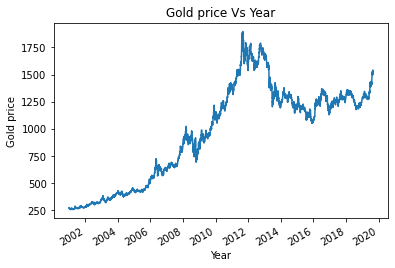

In [5]:
#graphical representation of gold price vs year
plt.title('Gold price Vs Year')  #-----title of plot
dt['USD (AM)'].plot()                  #---plot according to close value

# defining x& y axis
plt.xlabel('Year')
plt.ylabel('Gold price')

#show the graph
plt.show()

# ***Create Train & Test Sets***

In [6]:
dt['MA_5'] = data['USD (AM)'].rolling(window = 5).mean()

dt['MA-10'] = data['USD (AM)'].rolling(window = 10).mean()
dt = dt.dropna()
# dt['MA-10']

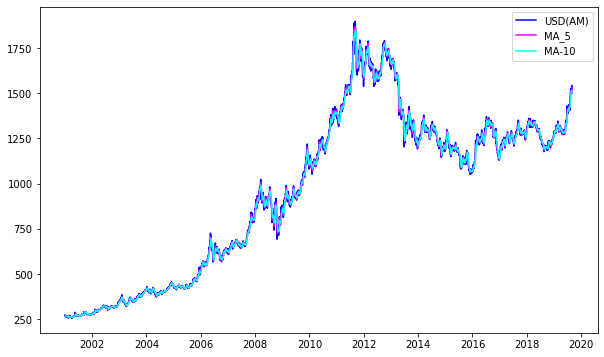

In [7]:
# visulization of moving average 15, 30 days vs  close value
plt.figure(figsize =(10,6))
plt.plot(data['USD (AM)'],label = 'Given_price',color='blue')
plt.plot(dt['MA_5'],label = ' moving average 5days',color='magenta')
plt.plot(dt['MA-10'],label = 'moving average 10 days',color='cyan')

plt.legend(['USD(AM)','MA_5','MA-10'])
plt.show()

In [8]:
# train & test  spliting

X = dt[['MA_5','MA-10']]
y = dt['USD (AM)']

t = 0.8
t = int(t*len(dt))
X_train,X_test,y_train,y_test = X[:t].round(4),X[t:].round(4),y[:t].round(4),y[t:].round(4)

# X_train,X_test,y_train,y_test

# ***Develop Models & Predictions***

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [10]:
dt.isnull().sum()

USD (AM)    0
MA_5        0
MA-10       0
dtype: int64

In [11]:
dt = dt[['USD (AM)','MA_5','MA-10']]
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4709 entries, 2001-01-15 to 2019-09-02
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   USD (AM)  4709 non-null   float64
 1   MA_5      4709 non-null   float64
 2   MA-10     4709 non-null   float64
dtypes: float64(3)
memory usage: 147.2 KB


In [12]:
reg.fit(X_train,y_train)

LinearRegression()

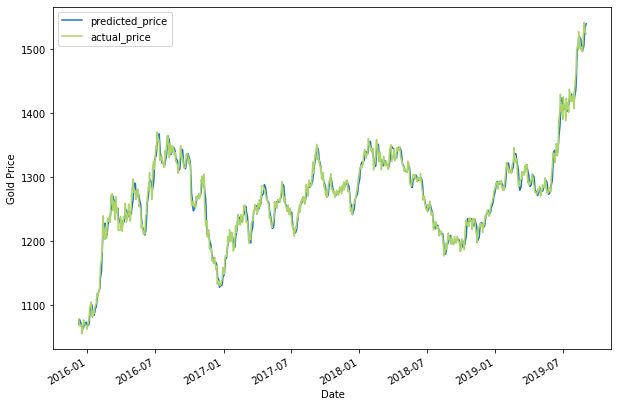

In [13]:
#visualization through actual price vs predicted price of gold
predicted_price = reg.predict(X_test) 
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,7))  

y_test.plot(color='#add466')  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Gold Price")  

plt.show()

In [14]:
# accurancy -->r^2 score of the model
r2_score = reg.score(X[t:],y[t:])*100 

float("{0:.2f}".format(r2_score))

98.25

# ***THANKS!!***